## PHYS247-Summer 2021: Homework 2 solution

In [230]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.stats import poisson
plt.rc('font', family='serif', size='15')

Let's read the tweet_count data:

## a)

In [231]:
data=pd.read_csv('tweet_counts.csv')

In [232]:
data.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


Let's create two variables (k and w) which show tweet counts and the number of week

In [233]:
k=data['count'].values
w=data['week'].values

## b)

Text(0.5, 0, 'Week')

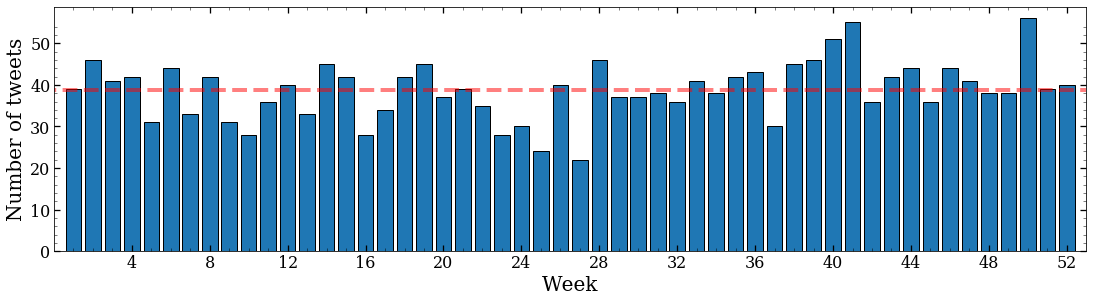

In [234]:
fig, ax = plt.subplots(1,1,  figsize=(18.5,4.5))

xmajor = np.arange(0,53,4)
xminor = np.arange(0,53,1)

ymajor = np.arange(0,55,10)
yminor = np.arange(0,55,2)

ax.set_xticks(xmajor)
ax.set_xticks(xminor,minor=True)
ax.set_yticks(ymajor)
ax.set_yticks(yminor,minor=True)


ax.bar(w,k,edgecolor='black')
ax.set_xlim(0.001,53)
ax.tick_params(which = 'major',direction='in',right='on',top='on',length=6,width=1.3,labelsize=16)
ax.tick_params(which = 'minor',direction='in',right='on',top='on',length=3,width=0.5)

plt.axhline(np.mean(k),-1,54,c='red',linestyle='--',linewidth=4,alpha=0.5)
ax.set_ylabel('Number of tweets',fontsize=20)
ax.set_xlabel('Week',fontsize=20)
# plt.savefig('tweets.png',dpi=200)

## C)

$E(\lambda)=\int_{0}^{\infty} \lambda P(\lambda) d\lambda=\int_{0}^{\infty} \lambda \alpha e^{-\alpha\lambda} d\lambda$, Define $x:=\lambda \alpha \Rightarrow \int_{0}^{\infty} x e^{-x} {dx\over\alpha}={1\over \alpha}[-e^{-x}(1+x)]_{0}^{\infty}={1\over \alpha}$

## d)

In [23]:
α=1/np.mean(k)
print(α)

0.025793650793650796


## e)

We define parameter space as (λ1_est,λ2_est,Ws_est) where we want to compute the posteriors

In [13]:
λ1_est=np.linspace(25,50,50)
λ2_est=np.linspace(25,50,50)
Ws_est=np.arange(1,53,1)

In the definition of the parameter space we assumed that the posterior of λ1 and λ2 are zero beyond the range of (25,50). Now go ahead and make a meshgrid to find the coordinate of every single point in the parameter space.

In [16]:
λ1_est_mesh,λ2_est_mesh, Ws_est_mesh,=np.meshgrid(λ1_est,λ2_est,Ws_est)

Let's check the shape of λ1_est_mesh:

In [18]:
λ1_est_mesh.shape

(50, 50, 52)

## f)

In [27]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

Unnormalized posterior function can be written as a product of priors and likelihoods. We should be careful that likelihood also depends on the value of W_s.

In [29]:
def Posterior(lamb1,lamb2,W_s):    
    P=1
    for i in k[w<W_s]:
        
        P=P*Poisson(i, lamb1)*α*np.exp(-α*lamb1)
        
    for j in k[w>=W_s]:
        
        P=P*Poisson(j, lamb2)*α*np.exp(-α*lamb2)
    return(P)

In [31]:
Posterior=np.vectorize(Posterior)

Let's get the posterior for all the data points in the parameter space.

In [32]:
Post=Posterior(λ1_est_mesh, λ2_est_mesh, Ws_est_mesh)

Now, we can get marginalized posteior for each parameter by summing up the posterior over two other parameters. 

In [34]:
Post_λ1=np.sum(np.sum(Post,axis=2).T,axis=1)/np.trapz(np.sum(np.sum(Post,axis=2).T,axis=1),λ1_est)
Post_λ2=np.sum(np.sum(Post,axis=2),axis=1)/np.trapz(np.sum(np.sum(Post,axis=2),axis=1),λ2_est)

Go ahead and plot the data

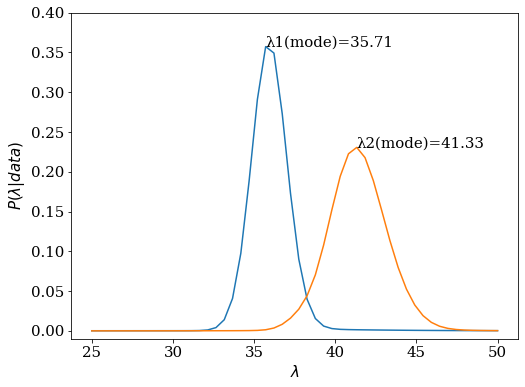

In [237]:
plt.figure(figsize=(8,6))
plt.plot(λ1_est,Post_λ1,label='$\lambda_1$')
plt.plot(λ2_est,Post_λ2,label='$\lambda_2$')
plt.text(λ1_est[np.argmax(Post_λ1)],np.max(Post_λ1),'λ1(mode)={:0.2f}'.format(λ1_est[np.argmax(Post_λ1)]),fontsize=15)
plt.text(λ2_est[np.argmax(Post_λ2)],np.max(Post_λ2),'λ2(mode)={:0.2f}'.format(λ2_est[np.argmax(Post_λ2)]),fontsize=15)
plt.ylim(-0.01,0.4)
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.show()

It seems that the difference of λ1 and λ2 are significant. Let's find when did this sudden change happen in Bob's tweeting habit.

<BarContainer object of 52 artists>

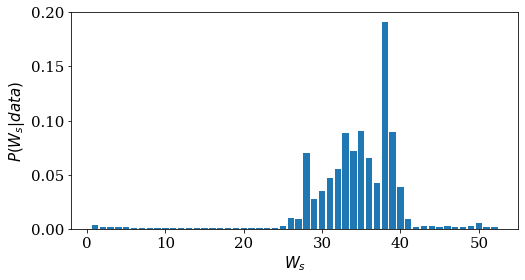

In [238]:
plt.figure(figsize=(8,4))
Post_Ws=np.sum(np.sum(Post,axis=1),axis=0)/np.trapz(np.sum(np.sum(Post,axis=1),axis=0),Ws_est)
plt.xlabel('$W_s$',fontsize=15)
plt.ylabel('$P(W_s|data)$',fontsize=15)
plt.bar(Ws_est,Post_Ws)

Let's find the peak of the Ws posterior:

In [239]:
print(Ws_est[np.argmax(Post_Ws)])

38


So, most likely his tweeting habit changed at week 38.

## g)

Let's get the joint probability distribution for λ1 and λ2

In [242]:
P_joint=np.sum(Post,axis=2)

And, plot it. I also plotted a white line which shows a boundary where all the points above the line satisfy $(\lambda_2-\lambda_1)>5$

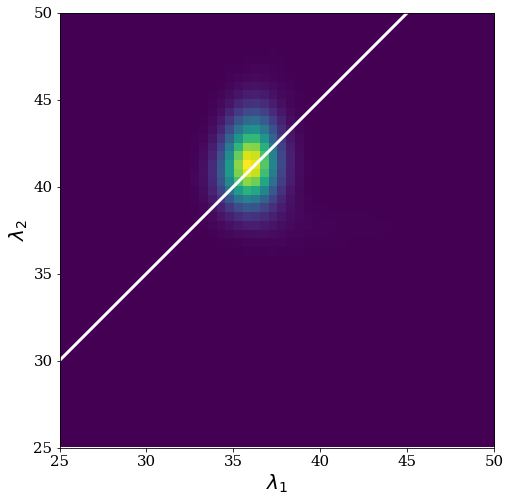

In [243]:
plt.figure(figsize=(8,8))
plt.imshow(P_joint,extent=[min(λ2_est),max(λ2_est),min(λ1_est),max(λ1_est)],origin='lower')
plt.xlabel("$\lambda_1$",fontsize=20)
plt.ylabel("$\lambda_2$",fontsize=20)

f=lambda x:x+5
plt.plot(λ1_est,f(λ1_est),linewidth=3,c='white')

plt.xlim(25,50)
plt.ylim(25,50)
plt.show()


To get $P[(\lambda_2-\lambda_1)>5]$ sum up all the values of posterior above the white line and divide it by the value of all the points in the joint probability

In [244]:
P_above_white_line=0
for i,λ1 in enumerate(λ1_est):
    for j,λ2 in enumerate(λ2_est):
        if (λ2-λ1)>5:
            P_above_white_line+=P_joint[j,i]          

In [245]:
Probability=P_above_white_line/np.sum(P_joint)
print(Probability)

0.627288368145252


So, $P[(\lambda_2-\lambda_1)>5]\sim 63\%$